In [14]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [15]:
# load data
data = pd.read_csv('data/combineVle.csv')
data.head()

,Unnamed: 0,id_student,code_module,code_presentation,total_score*weight,attempted_weight,adjusted_mark,mark,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation,total_click
0,0,6516,AAA,2014J,6350.0,100.0,48.055203,31.8,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,AAA_2014J,2791.0
1,1,8462,DDD,2013J,3490.0,40.0,NaN,NaN,M,London Region,HE Qualification,30-40%,55<=,0,90,N,Withdrawn,DDD_2013J,646.0
2,2,8462,DDD,2014J,4300.0,50.0,NaN,NaN,M,London Region,HE Qualification,30-40%,55<=,1,60,N,Withdrawn,DDD_2014J,10.0
3,3,11391,AAA,2013J,8240.0,100.0,64.006980,41.2,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,AAA_2013J,934.0
4,4,23629,BBB,2013B,1669.0,25.0,13.803681,8.3,F,East Anglian Region,Lower Than A Level,20-30%,0-35,2,60,N,Fail,BBB_2013B,161.0


In [3]:
# drop null, don't need
# data.dropna(inplace=True)
data.shape

(25843, 19)

In [4]:
# adjust IMD band Oct-20 to 10-20%, already done
# data["imd_band"] = data["imd_band"].replace('Oct-20', '10-20%')
# data.shape


,id_student,code_module,code_presentation,total_score*weight,attempted_weight,adjusted_mark,mark,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation
0,6516,AAA,2014J,6350.0,100.0,48.055203,31.8,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,AAA_2014J
3,11391,AAA,2013J,8240.0,100.0,64.006980,41.2,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,AAA_2013J
4,23629,BBB,2013B,1669.0,25.0,13.803681,8.3,F,East Anglian Region,Lower Than A Level,20-30%,0-35,2,60,N,Fail,BBB_2013B
5,23698,CCC,2014J,10997.0,150.0,73.300000,55.0,F,East Anglian Region,A Level or Equivalent,50-60%,0-35,0,120,N,Distinction,CCC_2014J
6,23798,BBB,2013J,8924.0,100.0,90.340760,44.6,M,Wales,A Level or Equivalent,50-60%,0-35,0,60,N,Distinction,BBB_2013J


In [4]:
temp_df =  data[["highest_education","final_result"]]
temp_df

,highest_education,final_result
0,HE Qualification,Pass
1,HE Qualification,Withdrawn
2,HE Qualification,Withdrawn
3,HE Qualification,Pass
4,Lower Than A Level,Fail
...,...,...
25838,Lower Than A Level,Pass
25839,Lower Than A Level,Withdrawn
25840,Lower Than A Level,Pass
25841,Lower Than A Level,Fail


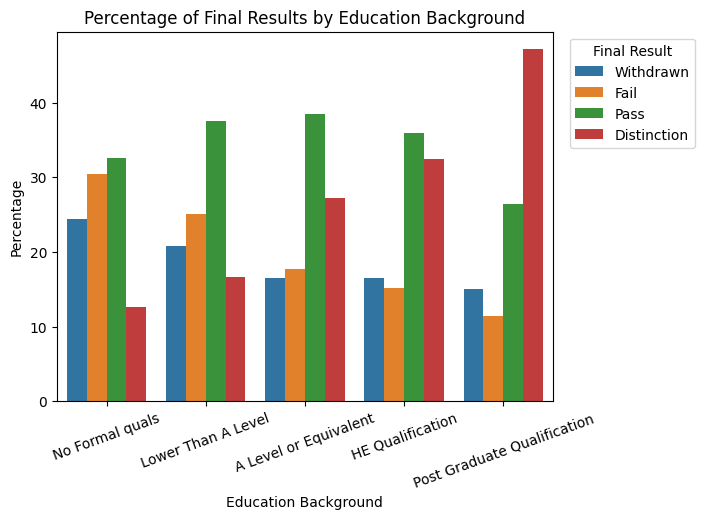

In [6]:
desired_order=["No Formal quals", "Lower Than A Level", "A Level or Equivalent", "HE Qualification", "Post Graduate Qualification"]

# Define the desired order of the final_result categories
category_order = ["Withdrawn", "Fail", "Pass", "Distinction"]

# Group the data by education level and final result, and calculate the percentage
grouped_data = temp_df.groupby(['highest_education', 'final_result']).size()
percentage = grouped_data / grouped_data.groupby('highest_education').transform('sum') * 100

# Reset the index of the grouped data
grouped_data = grouped_data.reset_index()
percentage = percentage.reset_index()

# Order the final_result categories using pd.Categorical
percentage['final_result'] = pd.Categorical(percentage['final_result'], categories=category_order)

# Plot the grouped bar chart
sns.barplot(data=percentage, x='highest_education', y=0, hue='final_result', order=desired_order)
plt.xlabel('Education Background')
plt.ylabel('Percentage')
plt.title('Percentage of Final Results by Education Background')
plt.legend(title='Final Result', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.xticks(rotation=20)

# Show the plot
plt.show()

In [7]:
temp_df2 =  data[["age_band","final_result"]]
temp_df2

,age_band,final_result
0,55<=,Pass
1,55<=,Withdrawn
2,55<=,Withdrawn
3,55<=,Pass
4,0-35,Fail
...,...,...
25838,0-35,Pass
25839,0-35,Withdrawn
25840,0-35,Pass
25841,35-55,Fail


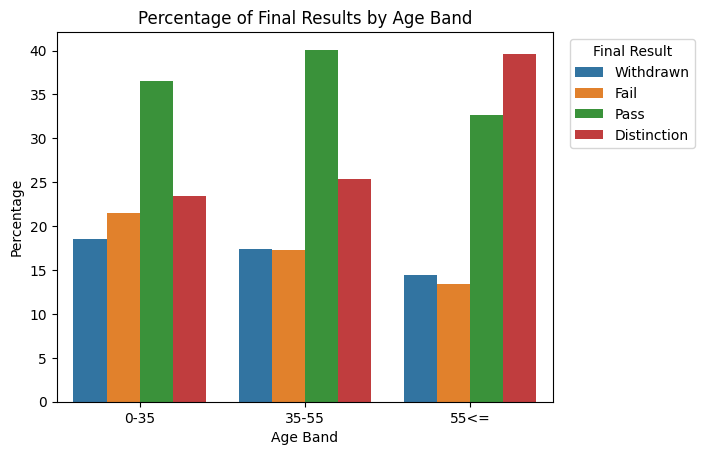

In [8]:
desired_order=["0-35", "35-55", "55<="]
# Define the desired order of the final_result categories
category_order = ["Withdrawn", "Fail", "Pass", "Distinction"]

# Group the data by age band and final result, and calculate the percentage
grouped_data = temp_df2.groupby(['age_band', 'final_result']).size()
percentage = grouped_data / grouped_data.groupby('age_band').transform('sum') * 100

# Reset the index of the grouped data
grouped_data = grouped_data.reset_index()
percentage = percentage.reset_index()

# Order the final_result categories using pd.Categorical
percentage['final_result'] = pd.Categorical(percentage['final_result'], categories=category_order)

# Plot the grouped bar chart
sns.barplot(data=percentage, x='age_band', y=0, hue='final_result', order=desired_order)
plt.xlabel('Age Band')
plt.ylabel('Percentage')
plt.title('Percentage of Final Results by Age Band')
plt.legend(title='Final Result', bbox_to_anchor=(1.02, 1), loc='upper left')

# plt.xticks(rotation=20)

# Show the plot
plt.show()

In [9]:
temp_df3 =  data[["imd_band","final_result"]]
temp_df3

,imd_band,final_result
0,80-90%,Pass
1,30-40%,Withdrawn
2,30-40%,Withdrawn
3,90-100%,Pass
4,20-30%,Fail
...,...,...
25838,60-70%,Pass
25839,50-60%,Withdrawn
25840,50-60%,Pass
25841,50-60%,Fail


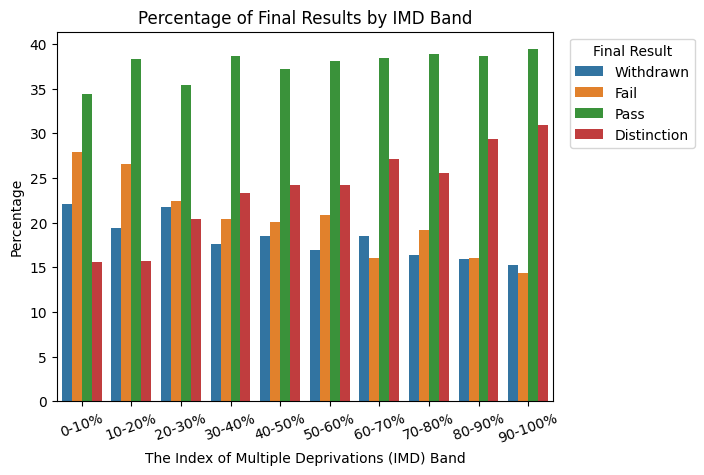

In [10]:
desired_order=["0-10%", "10-20%", "20-30%", "30-40%", "40-50%", "50-60%", "60-70%", "70-80%", "80-90%", "90-100%"]

# Define the desired order of the final_result categories
category_order = ["Withdrawn", "Fail", "Pass", "Distinction"]

# Group the data by age band and final result, and calculate the percentage
grouped_data = temp_df3.groupby(['imd_band', 'final_result']).size()
percentage = grouped_data / grouped_data.groupby('imd_band').transform('sum') * 100

# Reset the index of the grouped data
grouped_data = grouped_data.reset_index()
percentage = percentage.reset_index()

# Order the final_result categories using pd.Categorical
percentage['final_result'] = pd.Categorical(percentage['final_result'], categories=category_order)

# Plot the grouped bar chart
sns.barplot(data=percentage, x='imd_band', y=0, hue='final_result', order=desired_order)
plt.xlabel('The Index of Multiple Deprivations (IMD) Band')
plt.ylabel('Percentage')
plt.title('Percentage of Final Results by IMD Band')
plt.legend(title='Final Result', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.xticks(rotation=20)

# Show the plot
plt.show()

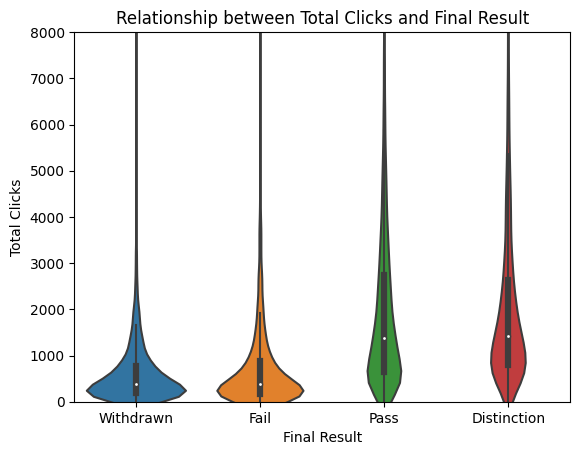

In [6]:
# Create the violin plot
sns.violinplot(data=data, x='final_result', y='total_click', order=["Withdrawn", "Fail", "Pass", "Distinction"])
plt.ylim(0, 8000)
# Add labels and title
plt.xlabel('Final Result')
plt.ylabel('Total Clicks')
plt.title('Relationship between Total Clicks and Final Result')

# Show the plot
plt.show()

In [19]:
# process data, change string to integer
# change age_band
data["age_band"] = data["age_band"].map({"0-35":1, "35-55":2, "55<=":3})

# preprocess "edu" column
data["highest_education"] = data["highest_education"] .map({"No Formal quals":0, "Lower Than A Level":1, "A Level or Equivalent":2, "HE Qualification":3, "Post Graduate Qualification":4})

# change imd_band 
data["imd_band"] = data["imd_band"].map({"0-10%":0, "10-20%":1, "20-30%":2, "30-40%":3, "40-50%":4, "50-60%":5, "60-70%":6, "70-80%":7, "80-90%":8, "90-100%":9})

# change gender
# data["gender"] = data["gender"].map({"M":1, "F":0})

#change disability
# data["disability"] = data["disability"].map({"N":0, "Y":1})

# change code_module 
# data["code_module"] = data["code_module"].map({"AAA":1, "BBB":2, "CCC":3, "DDD":4, "EEE":5, "FFF":6, "GGG":7})

# change code_presentation
# data["code_presentation"] = data["code_presentation"].map({"2013B":1, "2013J":2, "2014B":3, "2014J":4})

data["final_result"] = data["final_result"].map({"Withdrawn":0,  "Fail":0,  "Pass":1, "Distinction":1})
data.shape

(25843, 19)

In [6]:
# Sort 'module_presentation' column alphabetically
data = data.sort_values('module_presentation')
data.head(20)

,Unnamed: 0,id_student,code_module,code_presentation,total_score*weight,attempted_weight,adjusted_mark,mark,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation,total_click
3338,3338,366483,AAA,2013J,7700.0,100.0,59.305203,38.5,M,South West Region,3,4.0,1,0,60,N,1,AAA_2013J,1465.0
1297,1297,183947,AAA,2013J,4660.0,100.0,41.234137,23.3,M,London Region,2,1.0,1,0,180,N,1,AAA_2013J,964.0
1299,1299,184271,AAA,2013J,5870.0,100.0,45.209391,29.4,M,South West Region,3,8.0,2,0,170,N,1,AAA_2013J,1312.0
374,374,77367,AAA,2013J,6950.0,100.0,52.566624,34.8,M,East Midlands Region,2,3.0,1,0,60,N,1,AAA_2013J,680.0
1315,1315,185439,AAA,2013J,740.0,10.0,6.372699,3.7,M,London Region,3,1.0,1,0,120,N,0,AAA_2013J,427.0
1318,1318,186149,AAA,2013J,7560.0,100.0,58.004442,37.8,M,Scotland,3,3.0,2,0,60,N,1,AAA_2013J,2136.0
1325,1325,187100,AAA,2013J,8940.0,100.0,90.576671,44.7,M,South East Region,2,5.0,2,0,60,N,1,AAA_2013J,8562.0
1339,1339,188278,AAA,2013J,760.0,10.0,NaN,NaN,M,Yorkshire Region,2,7.0,2,0,120,N,0,AAA_2013J,1434.0
1358,1358,189879,AAA,2013J,7880.0,100.0,60.983503,39.4,M,Scotland,2,9.0,1,0,120,N,1,AAA_2013J,1541.0
24909,24909,2469673,AAA,2013J,4010.0,90.0,26.088957,20.0,F,Yorkshire Region,1,2.0,2,0,60,N,0,AAA_2013J,523.0


In [8]:
groups = data.groupby('module_presentation')
groups.describe()

Unnamed: 0                                                
                         count          mean           std    min       25%   
module_presentation                                                           
AAA_2013J                365.0  11491.827397  10979.433162    3.0   1562.00  \
AAA_2014J                340.0  10210.591176  10227.832358    0.0   1960.75   
BBB_2013B               1369.0   8434.770636   6018.896366    4.0   5143.00   
BBB_2013J               1710.0  11034.850292   6200.338546    6.0   6240.75   
BBB_2014B               1205.0  13405.458091   6853.415542   15.0   7672.00   
BBB_2014J               1793.0  16726.056888   7142.793725   20.0  12150.00   
CCC_2014B               1415.0  12158.180919   7240.827222   35.0   5841.50   
CCC_2014J               1998.0  14298.670170   7461.653495    5.0   7546.25   
DDD_2013B               1065.0   8979.762441   7404.968062  123.0   4102.00   
DDD_2013J               1507.0  10434.725282   6820.287270    1.0   4932.00   
DDD_2014B                944.0  13423.206568   7191.027508    8.0   7050.75   
DDD_2014J               1428.0  15468.341737   7700.151477    2.0   9274.75   
EEE_2013J                827.0  11314.796856   6166.287591   98.0   6490.50   
EEE_2014B                536.0  13680.832090   6496.189648   12.0   8415.50   
EEE_2014J                935.0  17079.311230   6925.053923  158.0  13951.50   
FFF_2013B               1371.0   8677.283735   6634.282092   81.0   4504.00   
FFF_2013J               1874.0  11322.573106   6268.453402   19.0   6703.50   
FFF_2014B               1206.0  13564.563018   6846.352510   18.0   7707.25   
FFF_2014J               1843.0  16495.829083   7327.820009   63.0  11918.50   
GGG_2013J                819.0  12335.008547   5190.174620    9.0  10854.50   
GGG_2014B                689.0  14930.680697   5574.141213    7.0  13912.00   
GGG_2014J                604.0  18120.667219   6110.214414   61.0  18475.75   

                                                id_student                ...   
                         50%       75%      max      count          mean  ...   
module_presentation                                                       ...   
AAA_2013J             3836.0  24140.00  25838.0      365.0  1.034260e+06  ...  \
AAA_2014J             3990.0  23444.25  25824.0      340.0  8.779559e+05  ...   
BBB_2013B             7857.0   9359.00  25813.0     1369.0  6.511519e+05  ...   
BBB_2013J            11528.0  14524.75  25805.0     1710.0  6.689354e+05  ...   
BBB_2014B            16171.0  17922.00  25783.0     1205.0  7.048456e+05  ...   
BBB_2014J            20036.0  21998.00  25842.0     1793.0  7.234631e+05  ...   
CCC_2014B            12273.0  17625.50  25839.0     1415.0  7.124446e+05  ...   
CCC_2014J            15653.0  20935.00  25808.0     1998.0  7.141743e+05  ...   
DDD_2013B             7392.0   9580.00  25827.0     1065.0  7.318094e+05  ...   
DDD_2013J            10516.0  14013.00  25829.0     1507.0  6.896739e+05  ...   
DDD_2014B            15966.0  17971.25  25837.0      944.0  7.498121e+05  ...   
DDD_2014J            19196.5  21532.50  25798.0     1428.0  7.384982e+05  ...   
EEE_2013J            11661.0  14306.00  25840.0      827.0  6.868233e+05  ...   
EEE_2014B            16151.5  17921.50  25619.0      536.0  6.787070e+05  ...   
EEE_2014J            20039.0  21760.50  25776.0      935.0  7.198586e+05  ...   
FFF_2013B             7659.0   9306.00  25806.0     1371.0  6.760346e+05  ...   
FFF_2013J            11726.5  14289.75  25836.0     1874.0  6.856695e+05  ...   
FFF_2014B            16174.5  18003.25  25833.0     1206.0  7.020402e+05  ...   
FFF_2014J            19835.0  21588.50  25835.0     1843.0  7.291834e+05  ...   
GGG_2013J            12855.0  14515.50  25726.0      819.0  6.704378e+05  ...   
GGG_2014B            16764.0  18062.00  25828.0      689.0  6.531510e+05  ...   
GGG_2014J            20170.5  21751.25  25755.0      604.0  7.045915e+05  ...   

                  

In [17]:
# change module_presentation
change={"AAA_2013J":1, "AAA_2014J":2, "BBB_2013B":3, "BBB_2013J":4, "BBB_2014B":5, "BBB_2014J":6, "CCC_2014B":7, "CCC_2014J":8,\
        "DDD_2013B":9, "DDD_2013J":10, "DDD_2014B":11, "DDD_2014J":12, "EEE_2013J":13, "EEE_2014B":14, "EEE_2014J":15,\
        "FFF_2013B":16, "FFF_2013J":17, "FFF_2014B":18, "FFF_2014J":19, "GGG_2013J":20, "GGG_2014B":21, "GGG_2014J":22}
data["module_presentation"] = data["module_presentation"].map(change)

In [11]:
data.head(20)

,Unnamed: 0,id_student,code_module,code_presentation,total_score*weight,attempted_weight,adjusted_mark,mark,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation,total_click
3338,3338,366483,AAA,2013J,7700.0,100.0,59.305203,38.5,M,South West Region,3,4.0,1,0,60,N,1,1,1465.0
1297,1297,183947,AAA,2013J,4660.0,100.0,41.234137,23.3,M,London Region,2,1.0,1,0,180,N,1,1,964.0
1299,1299,184271,AAA,2013J,5870.0,100.0,45.209391,29.4,M,South West Region,3,8.0,2,0,170,N,1,1,1312.0
374,374,77367,AAA,2013J,6950.0,100.0,52.566624,34.8,M,East Midlands Region,2,3.0,1,0,60,N,1,1,680.0
1315,1315,185439,AAA,2013J,740.0,10.0,6.372699,3.7,M,London Region,3,1.0,1,0,120,N,0,1,427.0
1318,1318,186149,AAA,2013J,7560.0,100.0,58.004442,37.8,M,Scotland,3,3.0,2,0,60,N,1,1,2136.0
1325,1325,187100,AAA,2013J,8940.0,100.0,90.576671,44.7,M,South East Region,2,5.0,2,0,60,N,1,1,8562.0
1339,1339,188278,AAA,2013J,760.0,10.0,NaN,NaN,M,Yorkshire Region,2,7.0,2,0,120,N,0,1,1434.0
1358,1358,189879,AAA,2013J,7880.0,100.0,60.983503,39.4,M,Scotland,2,9.0,1,0,120,N,1,1,1541.0
24909,24909,2469673,AAA,2013J,4010.0,90.0,26.088957,20.0,F,Yorkshire Region,1,2.0,2,0,60,N,0,1,523.0


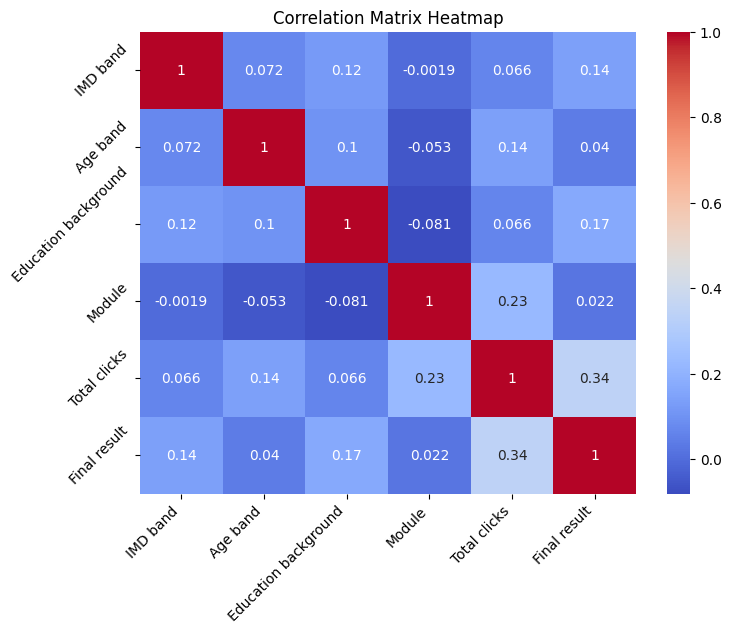

In [20]:
columns = ['imd_band', 'age_band', 'highest_education','module_presentation', 'total_click', 'total_score*weight']
corr_matrix = data[columns].corr()

# Create a heatmap with improved visualization
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)

# Set column names for better readability
ax.set_xticklabels(['IMD band', 'Age band', 'Education background', 'Module', 'Total clicks','Final result'])
ax.set_yticklabels(['IMD band', 'Age band', 'Education background', 'Module', 'Total clicks', 'Final result'])

# Set plot title
plt.title("Correlation Matrix Heatmap")

# Rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')

# Display the plot
plt.show()


In [ ]:
data.dropna()